In [1]:
pip install yfinance --upgrade --no-cache-dir

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import datetime as dt
import scipy
    
tickers = ['^GSPC','DX-Y.NYB', 'AZN', 'BRK-A', 'SHEL', 'ZURN.SW', 'FER.MC', 'BIMBOA.MX', 'GC=F', '^TNX']
 
initial_investment = 1000000
 
data = yf.download(tickers, start="2020-01-01", end="2023-09-21")['Close']
 
returns = data.pct_change()

returns.tail()

[*********************100%%**********************]  10 of 10 completed


,AZN,BIMBOA.MX,BRK-A,DX-Y.NYB,FER.MC,GC=F,SHEL,ZURN.SW,^GSPC,^TNX
Date,,,,,,,,,,
2023-09-14,0.020015,-0.004964,0.006784,0.006109,0.014885,0.000471,0.022055,0.012181,0.008430,0.009179
2023-09-15,0.007229,-0.003528,-0.003988,-0.000854,0.014333,0.007173,-0.010560,0.004483,-0.012160,0.007929
2023-09-18,-0.024022,0.008913,0.005898,-0.001139,-0.004272,0.004055,0.008971,0.001409,0.000721,-0.000694
2023-09-19,0.000600,0.000847,0.000485,0.000000,0.008911,0.000259,-0.000920,0.002346,-0.002151,0.010651
2023-09-20,0.019349,0.007860,-0.011531,-0.000380,-0.007524,0.007039,-0.003683,0.005851,-0.009395,-0.003665


In [4]:
returns.describe()

,AZN,BIMBOA.MX,BRK-A,DX-Y.NYB,FER.MC,GC=F,SHEL,ZURN.SW,^GSPC,^TNX
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,962.000000,963.000000,963.000000
mean,0.000463,0.001129,0.000607,0.000096,0.000279,0.000307,0.000428,0.000192,0.000421,0.001810
std,0.017457,0.021896,0.014301,0.004557,0.018335,0.010391,0.026032,0.015663,0.014658,0.043979
min,-0.106197,-0.117910,-0.085453,-0.021167,-0.124783,-0.049787,-0.171722,-0.137921,-0.119841,-0.293201
25%,-0.007610,-0.010843,-0.006601,-0.002441,-0.008475,-0.004412,-0.011492,-0.005493,-0.006003,-0.018079
50%,0.000452,0.000000,0.000551,0.000000,0.000000,0.000382,0.000000,0.000267,0.000277,0.000542
75%,0.009264,0.012185,0.007355,0.002688,0.009741,0.005617,0.012317,0.007687,0.007480,0.020983
max,0.083091,0.140780,0.112875,0.016525,0.136181,0.059477,0.196795,0.133579,0.093828,0.498998


In [5]:
cov_matrix = returns.cov()
cov_matrix

,AZN,BIMBOA.MX,BRK-A,DX-Y.NYB,FER.MC,GC=F,SHEL,ZURN.SW,^GSPC,^TNX
AZN,0.000305,0.000051,0.000093,-0.000013,0.000089,0.000027,0.000124,0.000073,0.000120,0.000081
BIMBOA.MX,0.000051,0.000479,0.000068,-0.000004,0.000066,0.000009,0.000112,0.000086,0.000088,0.000119
BRK-A,0.000093,0.000068,0.000205,-0.000013,0.000116,0.000012,0.000218,0.000113,0.000166,0.000187
DX-Y.NYB,-0.000013,-0.000004,-0.000013,0.000021,-0.000015,-0.000019,-0.000022,-0.000007,-0.000015,0.000041
FER.MC,0.000089,0.000066,0.000116,-0.000015,0.000336,0.000008,0.000216,0.000160,0.000117,0.000140
GC=F,0.000027,0.000009,0.000012,-0.000019,0.000008,0.000108,0.000038,0.000005,0.000019,-0.000107
SHEL,0.000124,0.000112,0.000218,-0.000022,0.000216,0.000038,0.000678,0.000218,0.000207,0.000322
ZURN.SW,0.000073,0.000086,0.000113,-0.000007,0.000160,0.000005,0.000218,0.000245,0.000105,0.000202
^GSPC,0.000120,0.000088,0.000166,-0.000015,0.000117,0.000019,0.000207,0.000105,0.000215,0.000182
^TNX,0.000081,0.000119,0.000187,0.000041,0.000140,-0.000107,0.000322,0.000202,0.000182,0.001934


In [6]:
avg_rets = returns.mean()
avg_rets       

AZN          0.000463
BIMBOA.MX    0.001129
BRK-A        0.000607
DX-Y.NYB     0.000096
FER.MC       0.000279
GC=F         0.000307
SHEL         0.000428
ZURN.SW      0.000192
^GSPC        0.000421
^TNX         0.001810
dtype: float64

## Calculamos el número de VaR asignando una ponderación a cada activo

In [7]:
weights = np.array([.0402, .3089, .1127, .1107, .0266, .2414, .007, .0221, .0172, .1134])

port_mean = avg_rets.dot(weights)
print("Portfolio Mean: ", port_mean)

port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
print("Portfolio St. Dev: ", port_stdev)

mean_investment = (1+port_mean) * initial_investment
print("Mean Investment: ", mean_investment)

stdev_investment = initial_investment * port_stdev
print("Investment St. Dev: ", stdev_investment,"\n")

conf_level1 = 0.01

from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)

var_1d1 = initial_investment - cutoff1

var_array = []
num_days = [1,7,15,30]
for x in num_days:    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 99% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2))+" ("+str(np.round(var_1d1 * np.sqrt(x)/initial_investment*100,2))+"%)")

Portfolio Mean:  0.0007476617845125012
Portfolio St. Dev:  0.010377479644844517
Mean Investment:  1000747.6617845126
Investment St. Dev:  10377.479644844516 

1 day VaR @ 99% confidence: 23393.97 (2.34%)
7 day VaR @ 99% confidence: 61894.62 (6.19%)
15 day VaR @ 99% confidence: 90604.44 (9.06%)
30 day VaR @ 99% confidence: 128134.03 (12.81%)


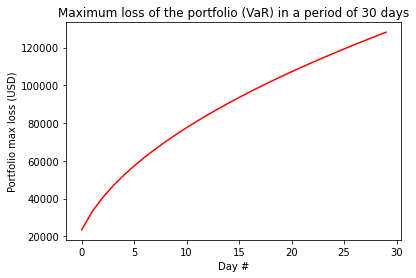

In [8]:
var_array = []
num_days = int(30)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.xlabel("Day #")
plt.ylabel("Portfolio max loss (USD)")
plt.title("Maximum loss of the portfolio (VaR) in a period of 30 days")
plt.plot(var_array, "r")

## Revisamos los retornos de cada activo contra una distribución normal

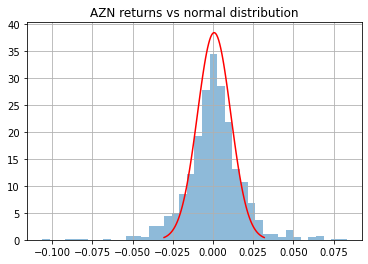

In [10]:
returns['AZN'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("AZN returns vs normal distribution")
plt.show()

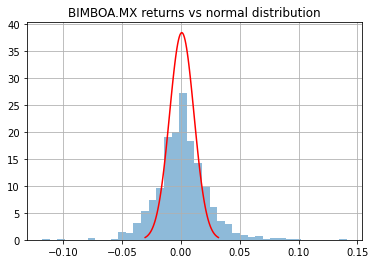

In [12]:
returns['BIMBOA.MX'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("BIMBOA.MX returns vs normal distribution")
plt.show()

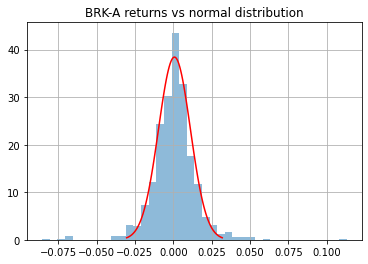

In [13]:
returns['BRK-A'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("BRK-A returns vs normal distribution")
plt.show()

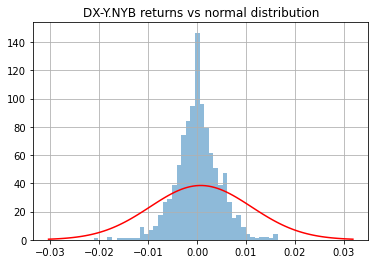

In [14]:
returns['DX-Y.NYB'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("DX-Y.NYB returns vs normal distribution")
plt.show()

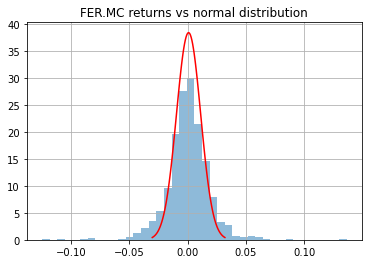

In [15]:
returns['FER.MC'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("FER.MC returns vs normal distribution")
plt.show()

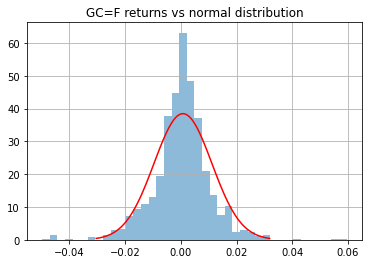

In [16]:
returns['GC=F'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("GC=F returns vs normal distribution")
plt.show()

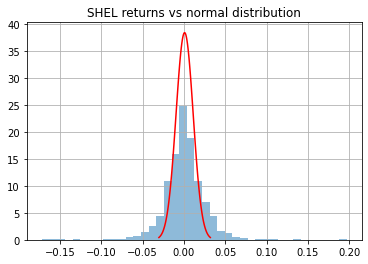

In [17]:
returns['SHEL'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("SHEL returns vs normal distribution")
plt.show()

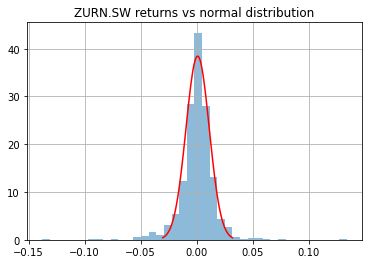

In [18]:
returns['ZURN.SW'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("ZURN.SW returns vs normal distribution")
plt.show()

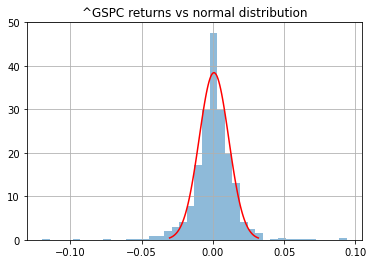

In [19]:
returns['^GSPC'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("^GSPC returns vs normal distribution")
plt.show()

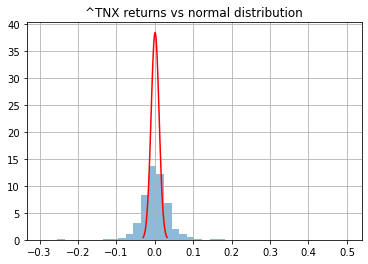

In [20]:
returns['^TNX'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("^TNX returns vs normal distribution")
plt.show()